# Project Notebook: The Linear Regression Model

## 1. Introduction

We started by building intuition for model based learning, explored how the linear regression model worked, understood how the two different approaches to model fitting worked, and some techniques for cleaning, transforming, and selecting features. In this project, you can practice what you learned by exploring ways to improve the models we built.

You'll work with housing data for the city of Ames, Iowa, United States from 2006 to 2010. You can also read about the different columns in the data [here](https://s3.amazonaws.com/dq-content/307/data_description.txt).

Let's start by setting up a pipeline of functions that will let us quickly iterate on different models.

**Tasks**

1. Import pandas, matplotlib, and numpy into the environment. Import the classes you need from scikit-learn as well.
2. Read `AmesHousing.tsv` () into a pandas data frame.
3. For the following functions, we recommend creating them in the first few cells in the notebook. This way, you can add cells to the end of the notebook to do experiments and update the functions in these cells.
* Create a function named `transform_features()` that, for now, just returns the train data frame.
* Create a function named `select_features()` that, for now, just returns the Gr Liv Area and SalePrice columns from the train data frame.
* Create a function named `train_and_test()` that, for now:

1. Selects the first 1460 rows from from data and assign to train.
2. Selects the remaining rows from data and assign to test.
3. Trains a model using all numerical columns except the SalePrice column (the target column) from the data frame returned from `select_features()`
4. Tests the model on the test set and returns the `RMSE` value.

**Introduction**

In [1]:
# Your code goes here
#Tasks
#------------------
#Import pandas, matplotlib, and numpy into the environment. 
#Import the classes you need from scikit-learn as well.

import pandas as pd                # Pandas for data manipulation
import numpy as np                 # Numpy for scientific computations
import matplotlib.pyplot as plt    # Matplotlib for visualisation
from sklearn.preprocessing import MinMaxScaler 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error



In [25]:
#Read AmesHousing.tsv () into a pandas data frame.
df = pd.read_csv('https://bit.ly/3boZCX4',delimiter = '\t')
#cleanup
df.columns = df.columns.str.strip().str.lower().str.replace(' ','_')
df.head()


,order,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,...,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type,sale_condition,saleprice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [3]:
#For the following functions, we recommend creating them in the first few cells in the notebook. 
#This way, you can add cells to the end of the notebook to do experiments and update the functions 
#in these cells.
#--------------------------------
#1. Create a function named transform_features() that, for now, just returns the train data frame.
def transform_features(d):
  return d.head(5)
transform_features(df)


,order,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,...,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type,sale_condition,saleprice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [4]:
df.columns

Index(['order', 'pid', 'ms_subclass', 'ms_zoning', 'lot_frontage', 'lot_area',
       'street', 'alley', 'lot_shape', 'land_contour', 'utilities',
       'lot_config', 'land_slope', 'neighborhood', 'condition_1',
       'condition_2', 'bldg_type', 'house_style', 'overall_qual',
       'overall_cond', 'year_built', 'year_remod/add', 'roof_style',
       'roof_matl', 'exterior_1st', 'exterior_2nd', 'mas_vnr_type',
       'mas_vnr_area', 'exter_qual', 'exter_cond', 'foundation', 'bsmt_qual',
       'bsmt_cond', 'bsmt_exposure', 'bsmtfin_type_1', 'bsmtfin_sf_1',
       'bsmtfin_type_2', 'bsmtfin_sf_2', 'bsmt_unf_sf', 'total_bsmt_sf',
       'heating', 'heating_qc', 'central_air', 'electrical', '1st_flr_sf',
       '2nd_flr_sf', 'low_qual_fin_sf', 'gr_liv_area', 'bsmt_full_bath',
       'bsmt_half_bath', 'full_bath', 'half_bath', 'bedroom_abvgr',
       'kitchen_abvgr', 'kitchen_qual', 'totrms_abvgrd', 'functional',
       'fireplaces', 'fireplace_qu', 'garage_type', 'garage_yr_blt',
      

In [5]:
#2. Create a function named select_features() that, for now, 
#just returns the Gr Liv Area and SalePrice columns from the train data frame.
def select_features(liv):
  liv = df[['gr_liv_area','saleprice']].copy()
  return liv.head(5)
select_features(df)

,gr_liv_area,saleprice
0,1656,215000
1,896,105000
2,1329,172000
3,2110,244000
4,1629,189900


In [6]:
df.dtypes

order               int64
pid                 int64
ms_subclass         int64
ms_zoning          object
lot_frontage      float64
                   ...   
mo_sold             int64
yr_sold             int64
sale_type          object
sale_condition     object
saleprice           int64
Length: 82, dtype: object

In [7]:
numeric_df = df.select_dtypes(include=np.number)
numeric_df.head(4)

,order,pid,ms_subclass,lot_frontage,lot_area,overall_qual,overall_cond,year_built,year_remod/add,mas_vnr_area,...,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,misc_val,mo_sold,yr_sold,saleprice
0,1,526301100,20,141.0,31770,6,5,1960,1960,112.0,...,210,62,0,0,0,0,0,5,2010,215000
1,2,526350040,20,80.0,11622,5,6,1961,1961,0.0,...,140,0,0,0,120,0,0,6,2010,105000
2,3,526351010,20,81.0,14267,6,6,1958,1958,108.0,...,393,36,0,0,0,0,12500,6,2010,172000
3,4,526353030,20,93.0,11160,7,5,1968,1968,0.0,...,0,0,0,0,0,0,0,4,2010,244000


In [ ]:
#df = df.reset_index()
#df.replace([np.inf, -np.inf], np.nan, inplace=True)
#df = np.nan_to_num(df)

In [8]:
#Create a function named train_and_test() that, for now:

def train_and_test(data_frame):
  #selecting numeric columns and dropping pid
  numerics = ['int16', 'int32', 'int64', 'float16', 'float32']
  newdf = df.select_dtypes(include=numerics)
  data_frame = newdf
  data_frame = data_frame.drop(columns=['pid'])
  #Selects the first 1460 rows from from data and assign to train.
  train=data_frame.iloc[:1460]
  #Selects the remaining rows from data and assign to test.
  test =data_frame.iloc[1461:]
  #Trains a model using all numerical columns except the SalePrice column 
  #(the target column) from the data frame returned from select_features()
  x_train = train.drop(columns='saleprice')
  y_train = train['saleprice']
  x_test = test.drop(columns='saleprice')
  y_test = test['saleprice']
  # We perform normalisation  
  norm = MinMaxScaler().fit(x_train) 
  x_train = norm.transform(x_train) 
  x_test = norm.transform(x_test)

  # ---Importing modules
  from sklearn.svm import SVR 
  from sklearn.neighbors import KNeighborsRegressor
  from sklearn.tree import DecisionTreeRegressor  

  #Models
  svm_regressor = SVR(kernel='rbf', C=10)
  knn_regressor = KNeighborsRegressor()
  dec_regressor = DecisionTreeRegressor(random_state=27)
  lr = LinearRegression()
  #fitting the data
  svm_regressor.fit(x_train, y_train)
  knn_regressor.fit(x_train, y_train)
  dec_regressor.fit(x_train, y_train)
  lr.fit(x_train, y_train)

  # Making Predictions  
  svm_y_pred = svm_regressor.predict(x_test)
  knn_y_pred = knn_regressor.predict(x_test)
  dec_y_pred = dec_regressor.predict(x_test)
  lr_y_pred = lr.predict(x_test)

  # Finally, evaluate our model 
  from sklearn import metrics 
  print('SVM RMSE:', np.sqrt(metrics.mean_squared_error(y_test, svm_y_pred)))
  print('KNN RMSE:', np.sqrt(metrics.mean_squared_error(y_test, knn_y_pred)))
  print('Decision Tree RMSE:', np.sqrt(metrics.mean_squared_error(y_test, dec_y_pred)))
  print('Linear Regression RMSE:', np.sqrt(metrics.mean_squared_error(y_test, lr_y_pred))) 

train_and_test(df)








SVM RMSE: 83853.66785086734
KNN RMSE: 49647.84524796089
Decision Tree RMSE: 42062.66344474671
Linear Regression RMSE: 80546.81400480309


## 2. Feature Engineering

Let's now start removing features with many missing values, diving deeper into potential categorical features, and transforming text and numerical columns. Update `transform_features()` so that any column from the data frame with more than 25% (or another cutoff value) missing values is dropped. You also need to remove any columns that leak information about the sale (e.g. like the year the sale happened). In general, the goal of this function is to:

* remove features that we don't want to use in the model, just based on the number of missing values or data leakage.
* transform features into the proper format (numerical to categorical, scaling numerical, filling in missing values, etc).
* create new features by combining other features.

Next, you need to get more familiar with the remaining columns by reading the data documentation for each column, determining what transformations are necessary (if any), and more. As we mentioned earlier, succeeding in predictive modeling (and competitions like Kaggle) is highly dependent on the quality of features the model has. Libraries like scikit-learn have made it quick and easy to simply try and tweak many different models, but cleaning, selecting, and transforming features are still more of an art that requires a bit of human ingenuity.

**Tasks**

1. As we mentioned earlier, we recommend adding some cells to explore and experiment with different features (before rewriting these functions).

2. The `transform_features()` function shouldn't modify the train data frame and instead return a new one entirely. This way, we can keep using train in the experimentation cells.

3. Which columns contain less than 5% missing values?
* For numerical columns that meet this criteria, let's fill in the missing values using the most popular value for that column.

4. What new features can we create, that better capture the information in some of the features?
* An example of this would be the `years_until_remod` feature we created in the last lesson.

5. Which columns need to be dropped for other reasons?
* Which columns aren't useful for machine learning?
* Which columns leak data about the final sale?

In [9]:
# Your code goes here
#Checking for percentage of missing data
percent_missing = df.isnull().sum() * 100 / len(df)
missing_value_df = pd.DataFrame({'column_name': df.columns,'percent_missing': percent_missing})
missing_value_df_to_drop =missing_value_df[missing_value_df['percent_missing'] >= 30]
missing_value_df_to_drop

,column_name,percent_missing
alley,alley,93.242321
fireplace_qu,fireplace_qu,48.532423
pool_qc,pool_qc,99.556314
fence,fence,80.477816
misc_feature,misc_feature,96.382253


In [10]:
#dropping the columns with more than 25% of missing values

df_dropped_missing = df.drop(columns=['pid','alley','fireplace_qu','pool_qc','fence','misc_feature'])
percent_missing = df.isnull().sum() * 100 / len(df)
missing_value_df = pd.DataFrame({'column_name': df.columns,'percent_missing': percent_missing})
missing_value_df_to_drop =missing_value_df[missing_value_df['percent_missing'] >= 30]
missing_value_df_to_drop

,column_name,percent_missing
alley,alley,93.242321
fireplace_qu,fireplace_qu,48.532423
pool_qc,pool_qc,99.556314
fence,fence,80.477816
misc_feature,misc_feature,96.382253


In [ ]:
df.shape

(2930, 76)

In [12]:
#Which columns contain less than 5% missing values?

percent_missing_1 = df_dropped_missing.isnull().sum() * 100 / len(df)
missing_value_df_below = pd.DataFrame({'column_name': df_dropped_missing.columns,'percent_missing': percent_missing_1})
missing_value_df__below=missing_value_df_below[missing_value_df_below['percent_missing'] <= 5]
missing_value_df_below['column_name']

#76 columns had less than 5% missing values

order                      order
ms_subclass          ms_subclass
ms_zoning              ms_zoning
lot_frontage        lot_frontage
lot_area                lot_area
                       ...      
mo_sold                  mo_sold
yr_sold                  yr_sold
sale_type              sale_type
sale_condition    sale_condition
saleprice              saleprice
Name: column_name, Length: 76, dtype: object

In [26]:
#select only the numeric columns
numerics = ['int16', 'int32', 'int64', 'float16', 'float32']
num_df = df_dropped_missing.select_dtypes(include=numerics)
num_df.isnull().sum()

order              0
ms_subclass        0
lot_area           0
overall_qual       0
overall_cond       0
year_built         0
year_remod/add     0
1st_flr_sf         0
2nd_flr_sf         0
low_qual_fin_sf    0
gr_liv_area        0
full_bath          0
half_bath          0
bedroom_abvgr      0
kitchen_abvgr      0
totrms_abvgrd      0
fireplaces         0
wood_deck_sf       0
open_porch_sf      0
enclosed_porch     0
3ssn_porch         0
screen_porch       0
pool_area          0
misc_val           0
mo_sold            0
yr_sold            0
saleprice          0
dtype: int64

In [27]:
num_df.columns

Index(['order', 'ms_subclass', 'lot_area', 'overall_qual', 'overall_cond',
       'year_built', 'year_remod/add', '1st_flr_sf', '2nd_flr_sf',
       'low_qual_fin_sf', 'gr_liv_area', 'full_bath', 'half_bath',
       'bedroom_abvgr', 'kitchen_abvgr', 'totrms_abvgrd', 'fireplaces',
       'wood_deck_sf', 'open_porch_sf', 'enclosed_porch', '3ssn_porch',
       'screen_porch', 'pool_area', 'misc_val', 'mo_sold', 'yr_sold',
       'saleprice'],
      dtype='object')

In [30]:
#Checking for corelation
#Selecting numeric data types
num_colums = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numerical_columns = list(newdf.select_dtypes(include=num_colums).columns)
num_df = newdf[numerical_columns]

#splitting data
from sklearn.model_selection import train_test_split
train_features, test_features, train_labels, test_labels = train_test_split(newdf.drop(labels=['saleprice'], axis=1),df['saleprice'],test_size=0.2,random_state=41)
#Removing correlated features
correlated_features = set()
correlation_matrix = newdf.corr()

for i in range(len(correlation_matrix .columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > 0.8:
            colname = correlation_matrix.columns[i]
            correlated_features.add(colname)

print(correlated_features)




{'yr_sold', 'totrms_abvgrd'}


In [31]:
#dropping the corelated features
newdf.drop(labels=correlated_features, axis=1, inplace=True)


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [32]:
newdf.columns

Index(['order', 'ms_subclass', 'lot_area', 'overall_qual', 'overall_cond',
       'year_built', 'year_remod/add', '1st_flr_sf', '2nd_flr_sf',
       'low_qual_fin_sf', 'gr_liv_area', 'full_bath', 'half_bath',
       'bedroom_abvgr', 'kitchen_abvgr', 'fireplaces', 'wood_deck_sf',
       'open_porch_sf', 'enclosed_porch', '3ssn_porch', 'screen_porch',
       'pool_area', 'misc_val', 'mo_sold', 'saleprice'],
      dtype='object')

In [33]:
newdf.head(5)

,order,ms_subclass,lot_area,overall_qual,overall_cond,year_built,year_remod/add,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,...,fireplaces,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,misc_val,mo_sold,saleprice
0,1,20,31770,6,5,1960,1960,1656,0,0,...,2,210,62,0,0,0,0,0,5,215000
1,2,20,11622,5,6,1961,1961,896,0,0,...,0,140,0,0,0,120,0,0,6,105000
2,3,20,14267,6,6,1958,1958,1329,0,0,...,0,393,36,0,0,0,0,12500,6,172000
3,4,20,11160,7,5,1968,1968,2110,0,0,...,2,0,0,0,0,0,0,0,4,244000
4,5,60,13830,5,5,1997,1998,928,701,0,...,1,212,34,0,0,0,0,0,3,189900


Which columns need to be dropped for other reasons?
Which columns aren't useful for machine learning?
Which columns leak data about the final sale?

In [ ]:
#Additional columns to drop
#year_built is the same as year remodelled,we can use the year remodelled
#The basement quality and fireplace quality can be used to represent the other basement and fireplace features



## 3. Feature Selection

Now that we have cleaned and transformed a lot of the features in the data set, it's time to move on to feature selection for numerical features.

**Tasks**

1. Generate a correlation heatmap matrix of the numerical features in the training data set.
* Which features correlate strongly with our target column, `SalePrice`?
* Calculate the correlation coefficients for the columns that seem to correlate well with `SalePrice`. Because we have a pipeline in place, it's easy to try different features and see which features result in a better cross validation score.

2. Which columns in the data frame should be converted to the categorical data type? All of the columns that can be categorized as nominal variables are candidates for being converted to categorical. Here are some other things you should think about:
* If a categorical column has hundreds of unique values (or categories), should you keep it? When you dummy code this column, hundreds of columns will need to be added back to the data frame.
* Which categorical columns have a few unique values but more than 95% of the values in the column belong to a specific category? This would be similar to a low variance numerical feature (no variability in the data for the model to capture).

3. Which columns are currently numerical but need to be encoded as categorical instead (because the numbers don't have any semantic meaning)?

4. What are some ways we can explore which categorical columns "correlate" well with `SalePrice`?

5. Update the logic for the `select_features()` function. This function should take in the new, modified train and test data frames that were returned from `transform_features()`.

<function matplotlib.pyplot.show>

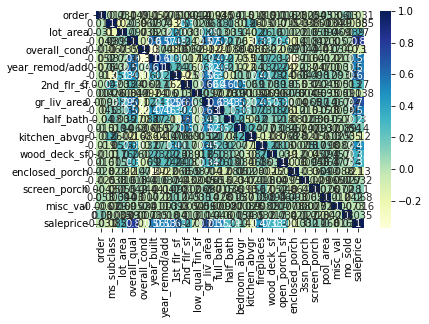

In [35]:
# Generate a correlation heatmap matrix of the numerical features in the training data set


import seaborn as sns
import matplotlib.pyplot as mp

dataplot = sns.heatmap(newdf.corr(), cmap="YlGnBu", annot=True)
mp.show

In [38]:
newdf.shape

(2930, 25)

## 4. Train and Test

Now for the final part of the pipeline, training and testing. When iterating on different features, using simple validation is a good idea. Let's add a parameter named `k` that controls the type of cross validation that occurs.

**Tasks**

1. The optional `k` parameter should accept integer values, with a default value of `0`.

2. When `k` equals `0`, perform holdout validation (what we already implemented):

* Select the first `1460` rows and assign to `train`.
* Select the remaining rows and assign to test.
* Train on `train` and `test` on test.
* Compute the `RMSE` and return.

3. When k equals 1, perform simple cross validation:

* Shuffle the ordering of the rows in the data frame.
* Select the first 1460 rows and assign to `fold_one`.
* Select the remaining rows and assign to `fold_two`.
* Train on `fold_one` and test on `fold_two`.
* Train on `fold_two` and test on `fold_one`.
* Compute the average RMSE and return.

4. When `k` is greater than `0`, implement k-fold cross validation using `k` folds:

* Perform `k-fold` cross validation using k folds.
* Calculate the average `RMSE` value and return this value.

In [ ]:
# Your code goes here

## 5. Next Steps

That's it for the guided steps. Here's some potenial next steps that you can take:

1. Continue iteration on feature engineering:
* Research some other approaches to feature engineering online around housing data.
* Visit the Kaggle kernels [page](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/kernels) page for this dataset to see approaches others took.

2. Improve your feature selection:
* Research ways of doing feature selection better with categorical columns (something we didn't cover in this particular course).